# CHE 1148 Assignment 4
## 1. Data quality  - Campaign response from transaction data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold

In [5]:
annual = pd.read_excel('annual_features_outputs.xlsx')
X_annual = annual.drop(columns=['customer_id','response','Unnamed: 0'])
y_annual = annual['response']
X_annual

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
0,70.666667,67.400000,70.666667,70.666667,39.000000,3,5,3,3,1,...,1,1,1,0,0,0,0,0,0,1
1,81.333333,74.800000,85.200000,56.500000,73.333333,3,5,5,4,3,...,0,3,0,0,2,0,0,0,0,1
2,85.200000,75.000000,70.400000,70.833333,79.000000,5,2,5,6,1,...,0,1,1,0,0,0,0,1,0,0
3,87.000000,67.571429,79.571429,78.250000,55.000000,3,7,7,4,1,...,2,0,2,0,0,0,0,1,0,0
4,58.750000,76.666667,59.000000,66.600000,0.000000,4,3,1,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,31.000000,33.666667,41.500000,56.000000,0.000000,2,3,2,6,0,...,1,1,2,0,0,0,0,0,0,0
6880,45.000000,39.500000,35.166667,42.000000,0.000000,2,4,6,2,0,...,0,0,0,0,0,0,0,0,0,0
6881,64.000000,54.400000,47.000000,32.500000,0.000000,2,5,2,4,0,...,0,1,1,0,0,0,0,0,0,0
6882,52.000000,25.250000,28.000000,21.000000,0.000000,3,4,3,2,0,...,0,0,2,0,0,0,0,0,0,0


### Completeness as the percentage of non-zero elements per column.

In [6]:
print("The percentage of non-zero elements in X is: {:.2f} %"
      .format(np.count_nonzero(X_annual) / X_annual.size * 100))

The percentage of non-zero elements in X is: 63.68 %


In [8]:
completeness = ((X_annual != 0).astype(int).sum(axis=0)/ X_annual.shape[0])*100
completeness

ann_txn_amt_ave_2011    94.392795
ann_txn_amt_ave_2012    98.837885
ann_txn_amt_ave_2013    98.794306
ann_txn_amt_ave_2014    98.794306
ann_txn_amt_ave_2015    61.374201
                          ...    
cnt_2015_Saturday       12.042417
cnt_2015_Sunday         12.696107
cnt_2015_Thursday       13.291691
cnt_2015_Tuesday        12.739686
cnt_2015_Wednesday      11.853574
Length: 75, dtype: float64

### Create the best Random Forest model (annual) created in the previous assignment.
I choose the values of hyperparameters according to the tunned results from 1147 assignment, as I think the tunning result is better as more hyperparameters are involved.

In [9]:
rf_annual =  RandomForestClassifier(random_state= 1148,class_weight= {0:1,1:10},
                                    max_depth= 5,n_estimators= 200, max_features= 10)
rf_annual.fit(X_annual, y_annual)

RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=5, max_features=10,
                       n_estimators=200, random_state=1148)

### Create the completeness-feature importance graph.
*  Make sure that appropriate scaling of the axis is used for the best visualization and interpretation (e.g. loglog or semi-log axis)
#### Calculate feature importance first

In [11]:
fea_importance= abs(rf_annual.feature_importances_)
fea_importance

array([0.00490113, 0.01162011, 0.03973187, 0.03480278, 0.00922467,
       0.0035961 , 0.0029161 , 0.05512491, 0.12315571, 0.00549137,
       0.0043493 , 0.01040824, 0.04782353, 0.05322806, 0.00885315,
       0.00671668, 0.01418451, 0.02006484, 0.02543434, 0.00953335,
       0.00486604, 0.0049033 , 0.02006149, 0.0245094 , 0.0020984 ,
       0.00276775, 0.00561818, 0.01484942, 0.01581319, 0.00185222,
       0.00692191, 0.01152129, 0.09977671, 0.17204339, 0.00745122,
       0.0036489 , 0.00509247, 0.01435028, 0.01745743, 0.00201288,
       0.00069981, 0.00067415, 0.00105939, 0.00091257, 0.00100129,
       0.00126679, 0.00140002, 0.00073144, 0.00066849, 0.00183518,
       0.00092435, 0.00238502, 0.00125674, 0.00174707, 0.00289189,
       0.00199402, 0.00372978, 0.00206765, 0.003302  , 0.00109268,
       0.00257474, 0.00277135, 0.00290959, 0.00210229, 0.01345287,
       0.00222459, 0.00239738, 0.00516951, 0.00086885, 0.00032905,
       0.0003661 , 0.00035786, 0.0019682 , 0.00123072, 0.00085

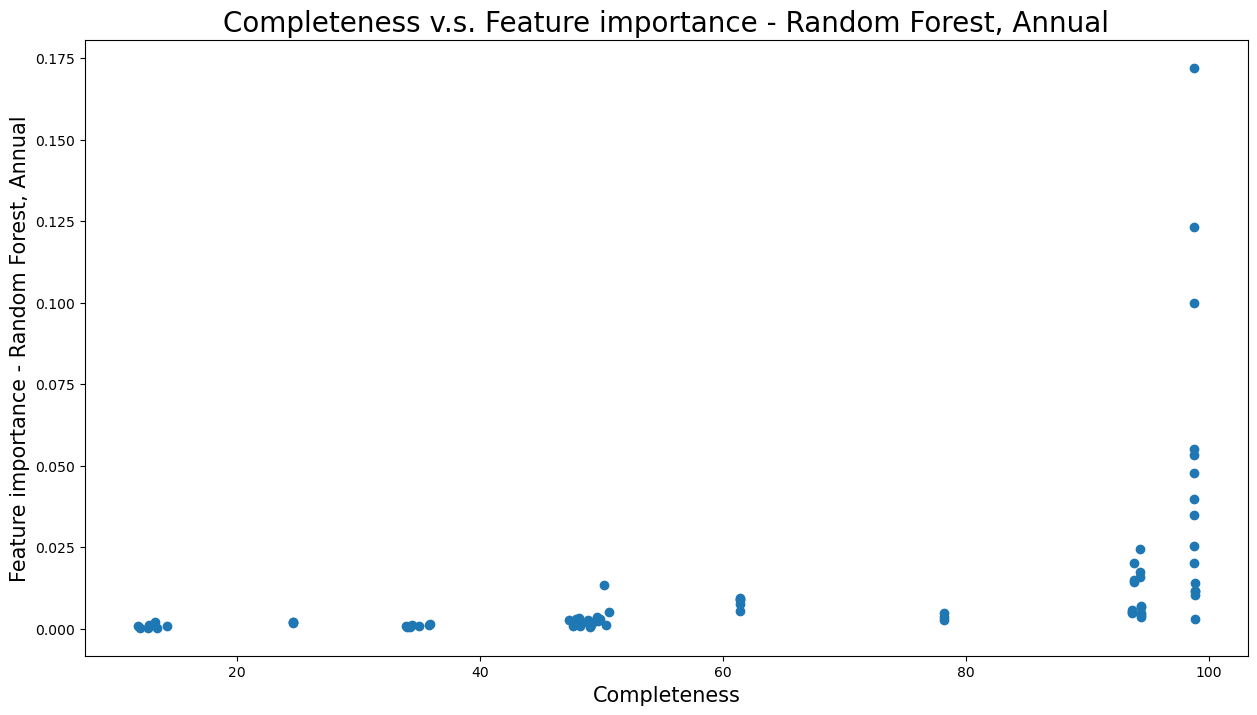

In [14]:
fig,ax = plt.subplots(figsize = (15, 8)) 
ax.scatter(completeness, fea_importance) 
plt.title('Completeness v.s. Feature importance - Random Forest, Annual', fontsize = 20)
plt.xlabel('Completeness', fontsize = 15)
plt.ylabel('Feature importance - Random Forest, Annual', fontsize = 15)
plt.show()

### Obseravtions:

The feature with higher completeness are more likely to be important, as the points approching 100% completeness are scattered up and down, indicating some of them have higher feature importance value, even though some others may still less important. There is no point representing low completness but high importance.
